## [충남대학교] 태양광 발전량 예측 AI 경진대회

에너지 사용량은 지속적으로 증가하는 가운데 2030년에는 화석연료가 사라질 것으로 추정 되며,

화석에너지의 고갈문제와 함께 환경문제에 대한 중요성이 언급 되면서 재생가능하고 친환경적인 신재생 에너지의 필요성이 대두되고 있습니다.

또한 태양에너지가 '탄소 중립' 시대의 주인공으로  조명받게 되면서 신재생에너지 태양광 발전에 대한 연구가 활발히 진행되고 있습니다.



[주제]

신재생에너지 태양광 발전량 예측을 위한 AI 알고리즘 개발



[설명]

신재생에너지 태양광 발전량을 일사량 및 기상 상황 데이터로 회귀 예측

1. train.csv : 학습 데이터

ID : 각 행의 고유한 번호

DHI : 수평면 산란일사량(Diffuse Horizontal Irradiance)

DNI : 법선면 직달일사량(Direct Normal Irradiance)

WS : 풍속(Wind Speed)

RH : 상대습도(Relative Humidity)

T : 기온(Temperature)

TARGET : 태양광 발전량 (kW) (목표 예측값)


2. test.csv : 테스트 데이터

ID : 각 행의 고유한 번호

DHI : 수평면 산란일사량(Diffuse Horizontal Irradiance)

DNI : 법선면 직달일사량(Direct Normal Irradiance)

WS : 풍속(Wind Speed)

RH : 상대습도(Relative Humidity)

T : 기온(Temperature)



3. sample_submission.csv : 제출 양식

ID : 각 행의 고유한 번호

TARGET : 태양광 발전량 (kW) (목표 예측값)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('./train.csv')

test = pd.read_csv('./test.csv')

In [4]:
train.head()

,ID,DHI,DNI,WS,RH,T,TARGET
0,1,0.315650,0.885087,3.129167,-0.563454,-0.106409,33.659014
1,2,0.075239,0.756084,3.068750,-1.030301,0.317479,20.747731
2,3,0.148714,0.628092,1.547917,-1.190128,0.411156,18.263065
3,4,0.821308,0.283800,3.020833,-0.218049,1.308111,21.072718
4,5,0.174578,0.592866,2.056250,0.286934,-0.312498,16.076963


### 데이터 전처리 / 클랜징

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      730 non-null    int64  
 1   DHI     730 non-null    float64
 2   DNI     730 non-null    float64
 3   WS      730 non-null    float64
 4   RH      730 non-null    float64
 5   T       730 non-null    float64
 6   TARGET  730 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 40.0 KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      365 non-null    int64  
 1   DHI     365 non-null    float64
 2   DNI     365 non-null    float64
 3   WS      365 non-null    float64
 4   RH      365 non-null    float64
 5   T       365 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 17.2 KB


* Train / Test : 결측치 X

* 숫자형 데이터

In [7]:
test.describe()

,ID,DHI,DNI,WS,RH,T
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,0.329754,0.469332,2.454880,0.030748,-0.010403
std,105.510663,0.245079,0.242836,0.868333,0.999314,0.991736
min,1.000000,0.001910,0.000000,0.945833,-2.099658,-2.469406
25%,92.000000,0.123145,0.289549,1.860417,-0.644566,-0.834746
50%,183.000000,0.268479,0.501113,2.262500,-0.028534,-0.087673
75%,274.000000,0.529170,0.651334,2.779167,0.720873,0.924036
max,365.000000,1.000000,0.968741,6.258333,2.817857,1.856120


* ID : 고유한 번호 = Index > 삭제(분석에 필요없는 피처)

### Train 데이터

#### 단변량 분석

* 숫자형 데이터 - hist / kde plot / box plot

In [24]:
# 숫자형 변수 단변량 분석 함수

def eda_1_n(var, data) :

    #기초통계량 (데이터프레임 형태)
    display(data[[var]].describe().T)  

    #시각화
    plt.figure(figsize = (10, 5))  # 그래프 크기 조절
    plt.subplot(3, 1, 1)  # 2행 1열로 1번째 그래프
    sns.histplot(x = var, data = data, bins= 30, kde = True)
    plt.grid()

    plt.subplot(3, 1, 2) # 2행 1열로 2번째 그래프
    sns.boxplot(x = var , data = data)
    plt.grid()  # 격자 추가

    plt.subplot(3, 1, 3) # 2행 1열로 2번째 그래프
    sns.violinplot(x = var , data = data)
    plt.grid()
    plt.show()  # 그래프 print


Feature : 숫자형 변수

-------------
ID : 각 행의 고유한 번호

DHI : 수평면 산란일사량(Diffuse Horizontal Irradiance)

DNI : 법선면 직달일사량(Direct Normal Irradiance)

WS : 풍속(Wind Speed)

RH : 상대습도(Relative Humidity)

T : 기온(Temperature)

------------
TARGET : 숫자형 변수

Target : 태양광 발전량 (kW) (목표 예측값)

-------



* 일사량 = 수평면 전일사량 + 법선면 직달일사량

1. DHI : 수평면 산란일사량(Diffuse Horizontal Irradiance)
    * 태양 복사가 지면에 떨어지면, 지면의 특성에 따라 일부는 반사, 일부는 투과되어 대기 중에서 산란, 일부는 지면에서 산란 등이 빌셍 이 중에서 지면에서 산란되는 일부분이 수평면 산란일사량
    * 지구의 위도, 경도, 시간대, 계절 등에 따라 변동 또한 지표면의 특성, 대기 조성, 구름 등도 영향을 미침
    * 식물의 광합성과 같은 태양 에너지를 이용하는 다양한 분야에서 중요한 역할 이를 측정하여 예측하면, 에너지 생산, 농업, 기상 예측 등에 활용

,count,mean,std,min,25%,50%,75%,max
DHI,730.0,0.35368,0.242069,0.0,0.145922,0.30845,0.535709,0.983835


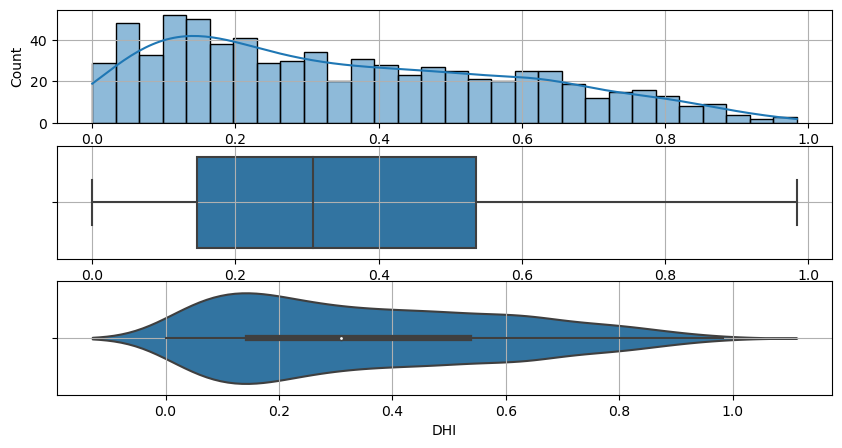

In [26]:
eda_1_n('DHI', train)

> 0의 근접한 값이 많으며, 0 ~ 1의 범위에 값들이 분포되어 있는 것을 확인 할 수 있다.

> 평균이 0.35정도 되는 것을 확인 할 수 있으며, 이상치로 판단되는 값이 없다는 것을 확인 할 수 있다.

2. DNI : 법선면 직달일사량
    * 표면이나 대기에서 법선면에 수직으로 닿는 태양 복사의 양을 의미
    * 수직으로 떨어지는 태양 복사를 측정하기 때문에 지표면의 경사각이나 방위각에 영향을 받지 않음
    * 달일사량은 에너지 생산, 건축물 설계, 태양열 이용 등에 활용
    * 태양열 이용에서는 직달일사량이 중요한 역할
    * 직달일사량이 높을수록 태양열 수집기가 더 많은 태양 에너지를 흡수하므로, 이를 활용하여 태양열 수집기의 설치 각도와 방향을 결정 가능

,count,mean,std,min,25%,50%,75%,max
DNI,730.0,0.449832,0.238223,0.00081,0.279639,0.444305,0.628943,1.0


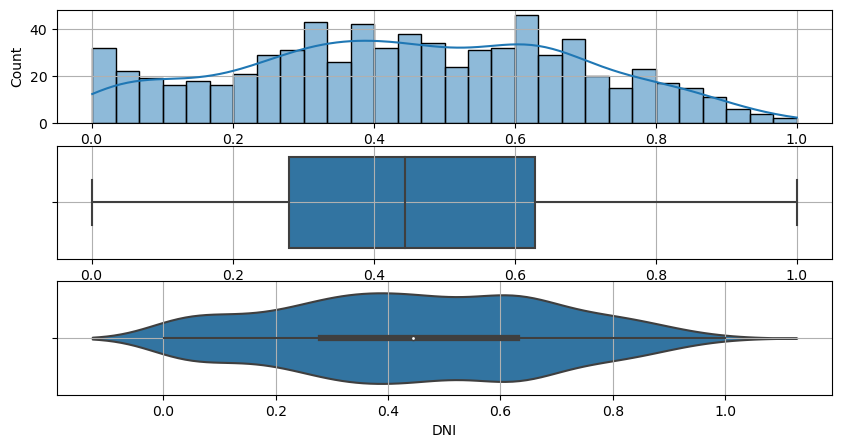

In [27]:
eda_1_n('DNI', train)

> 범선면의 직달일사량은 0 ~ 1 사이의 분포이며, 정규분포와 유사하게 띄는 것을 확인할 수 있다.

> 평균이 0.45정도이며 이상치로 판단되는 값이 보이지 않는 것을 확인 할 수 있다.

> 하루에 일사량이 수평면 전 일사량 보다 0.1정도 높게 나타난다는 것을 확인 할 수 있다.

> 

3. WS : 풍속(Wind Speed)

,count,mean,std,min,25%,50%,75%,max
WS,730.0,2.45661,0.894079,0.897917,1.855208,2.276042,2.855729,7.225


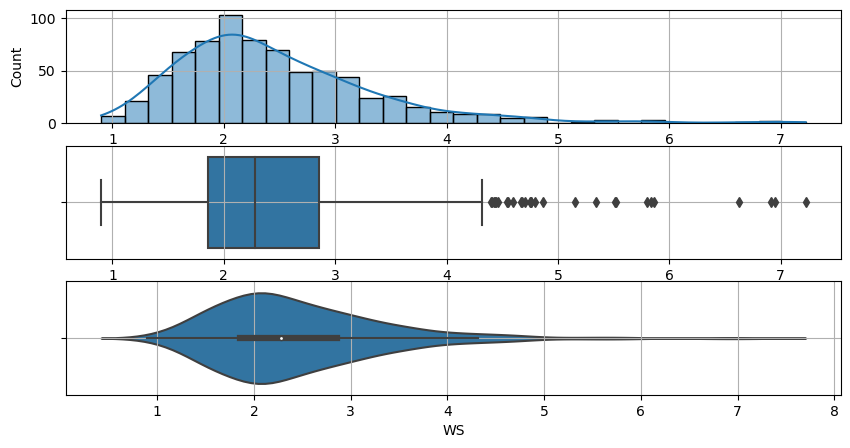

In [28]:
eda_1_n('WS', train)

> 풍속은 1부터 4까지의 범위에서 정규 분포를 띄는 것을 확인할 수 있다.

> 하지만 4이상의 값에서 이상치로 판단되는 값들이 나오는 것을 확인 할 수 있는데 이를 제거할지 판단해야 할 것 같다.

4. RH : 상대습도(Relative Humidity)

,count,mean,std,min,25%,50%,75%,max
RH,730.0,-0.015374,1.001358,-2.269194,-0.71442,-0.064874,0.721717,2.867445


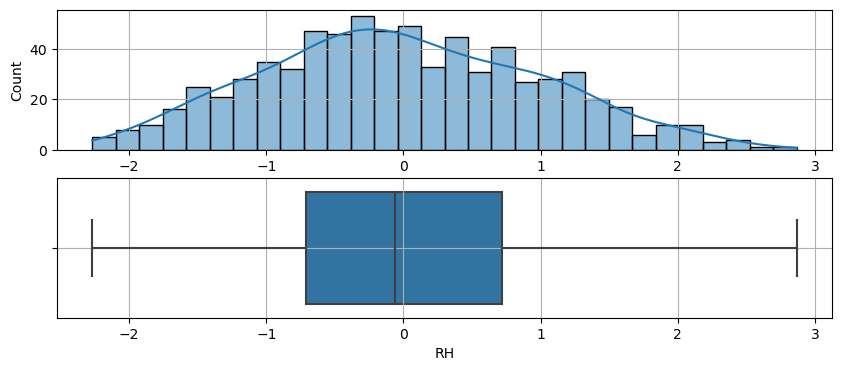

In [14]:
eda_1_n('RH', train)

> 상대습도는 -2 ~ 3까지의 정규 분표 형태를 띄는 것을 확인 할 수 있다.

> 상대습도는 대체적으로 백분율(%)로 표기 하는 것으로 알고있지만, 이 데이터 상에서 값들을 확인 해 봤을 때, 최대 최소값을 지정하고 관측 한 것 같다는 생각이 들었다.

5. T : 기온(Temperature)

,count,mean,std,min,25%,50%,75%,max
T,730.0,0.005201,1.005426,-2.628657,-0.813083,-0.053716,0.944528,1.790547


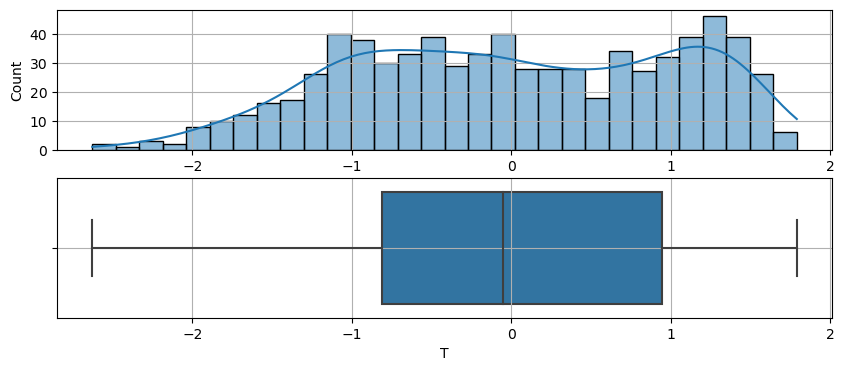

In [15]:
eda_1_n('T', train)

> 온도는 -2 ~ 2의 분포를 가지고 있으며, 0을 기준으로 봤을 때 1과 -1쪽의 분포가 많은 것을 확인 할 수 있다.

> 하지만 온도가 -2가 넘어가는 값들이 존재하는 것이 파악되며 계절별로 판단하기에는 어려운 데이터인 만큼 기온에 따른 일사량을 확인해 봐야할 것 같다.

> 또한 상대습도처럼 온도도 실제 온도가 아닌 -2 ~ 2의 분포인 것을 확인 할 수 있는데, 값들을 파악해볼 필요가 있다고 생각이 들었다.

* Target : 태양광 발전량 (kW) (목표 예측값)

,count,mean,std,min,25%,50%,75%,max
TARGET,730.0,17.76624,7.852125,1.958976,11.296985,17.238159,23.586436,36.376067


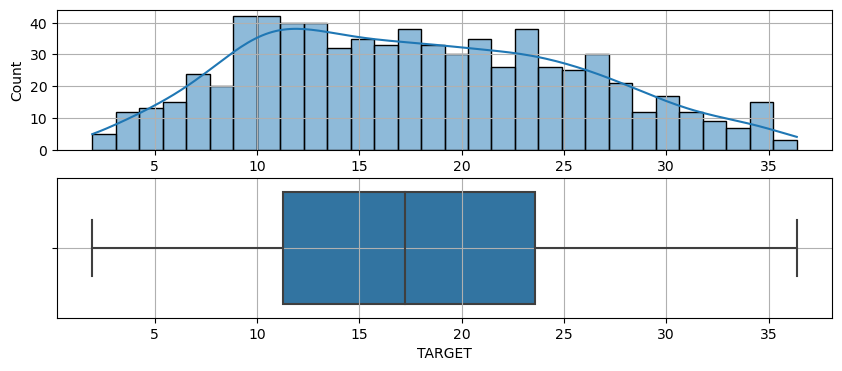

In [16]:
eda_1_n('TARGET', train)

> 타겟의 값인 태양광 발전량은 정규분포와 유사하게 나타나 있으며, 이를 볼 때 예측하기 적합하다고 생각이 들었다.

#### 이변량 분석 (숫자 - 숫자)

* 숫자와 숫자의 분석에서는 산점도를 통한 시각화를 대부분 시행하며, 상관계수를 이용해 어떤 관계를 가지는지 파악해볼 필요가 있다.
    * 따라서 'regplot / heatmap'을 이용한 분석을 시행하기로 판단 했으며, '일사량이 수평면 전일사량과 법선면 직달일사량의 합'인 것을 이용하여 새로운 컬럼을 만들어 분석도 추가적으로 진행해보려고 한다.
    * ID 컬럼은 삭제한다

In [33]:
train.drop(columns = ['ID'], inplace = True)

In [34]:
train['SOLAR'] = train['DHI'] + train['DNI']
train.head()

,DHI,DNI,WS,RH,T,TARGET,SOLAR
0,0.315650,0.885087,3.129167,-0.563454,-0.106409,33.659014,1.200738
1,0.075239,0.756084,3.068750,-1.030301,0.317479,20.747731,0.831323
2,0.148714,0.628092,1.547917,-1.190128,0.411156,18.263065,0.776807
3,0.821308,0.283800,3.020833,-0.218049,1.308111,21.072718,1.105108
4,0.174578,0.592866,2.056250,0.286934,-0.312498,16.076963,0.767443


In [36]:
# data = train
# feature = ['DHI', 'DNI', 'SOLAR','WS', 'RH', 'T']
target = 'TARGET'

In [37]:
import scipy.stats as spst # 가설검정 등 다양한 통계 함수들 제공

1. Target - DHI(수평면 산란일사량)

In [38]:
def eda_2_nn(data, feature, target):

    # 산점도 (시각화)
    sns.regplot(x = feature, y = target, data = data)
    plt.grid()
    plt.show()

    # 상관계수 , p-value 확인 (수치화)
    result = spst.pearsonr(data[feature], data[target])
    print(f'상관계수: {result[0]}, P-value: {result[1]}')

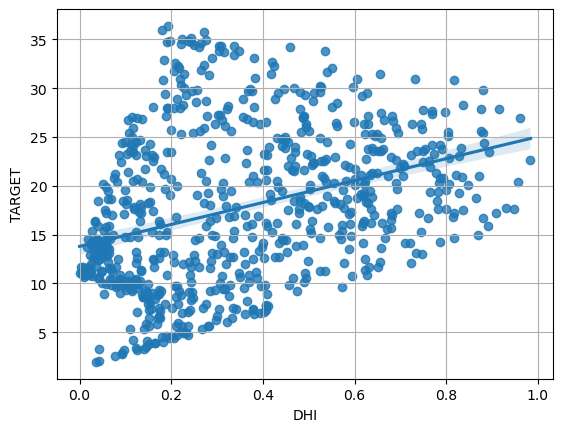

상관계수: 0.346327098840609, P-value: 5.35805063818823e-22


In [40]:
eda_2_nn(train, 'DHI', target)

> 약한 양의 상관관계를 가지는 것을 확인 할 수 있다.

2. Target - DNI(법선면 직달일사량)

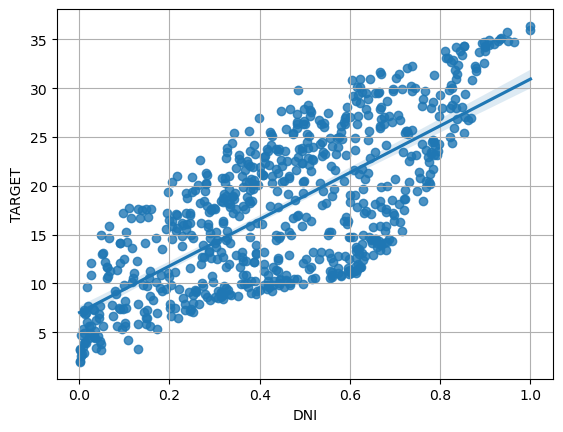

상관계수: 0.726132441839858, P-value: 1.4754690066736363e-120


In [41]:
eda_2_nn(train, 'DNI', target)

> 강한 양의 상관관계를 가지는 것을 확인 할 수 있다.

3. Target - SOLAR(일사량)

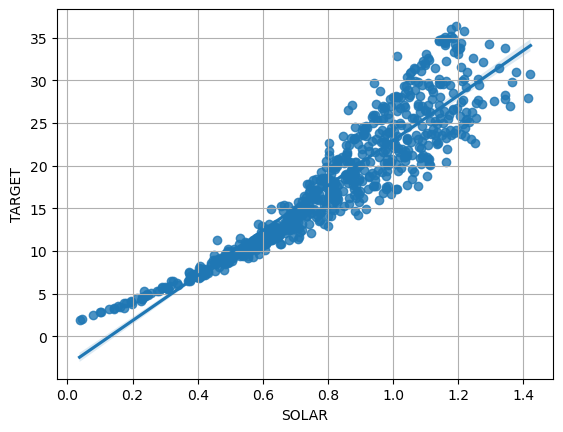

상관계수: 0.9289378150722514, P-value: 2.2641926e-316


In [42]:
eda_2_nn(train, 'SOLAR', target)

> 일사량이 Target과 유사하다는 것을 판단 할 수 있다. - 상관계수 0.92 

4. Target - WS(풍속)

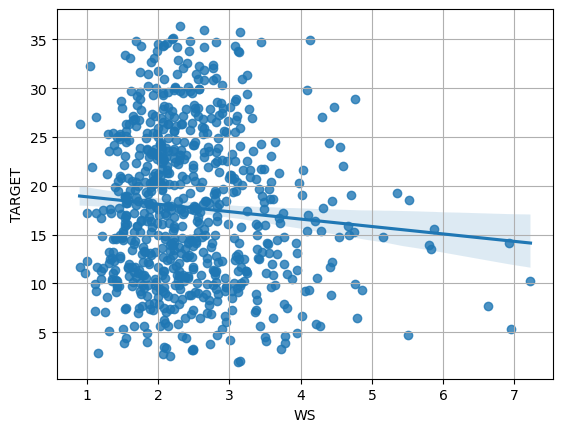

상관계수: -0.08668781506418473, P-value: 0.01915127592812633


In [43]:
eda_2_nn(train, 'WS', target)

> 풍속은 상관관계가 없다고 판단될 만큼 상관계수가 0에 가까웠다.

> 이상치를 제거해야겠다 생각했지만, 제거를 한다고해서 유의미한 결과가 도출되지 않다고 판단하여 이상치 제거를 하지 않았다.

5. Target - RH(상대습도)

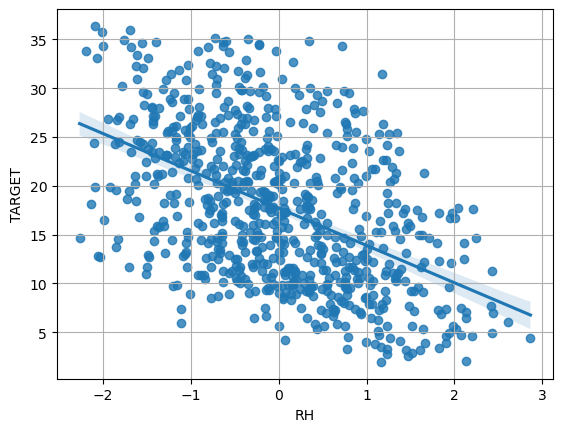

상관계수: -0.4868206581507647, P-value: 1.0509044422083985e-44


In [44]:
eda_2_nn(train, 'RH', target)

> 상대습도와 일조량의 상관관계가 -0.48로 강한 음의 상관관계가 나타났다.

> target을 판단할 때 어떻게 사용할지 추가적인 분석이 필요하다고 생각했다.

6. Target - T(온도)

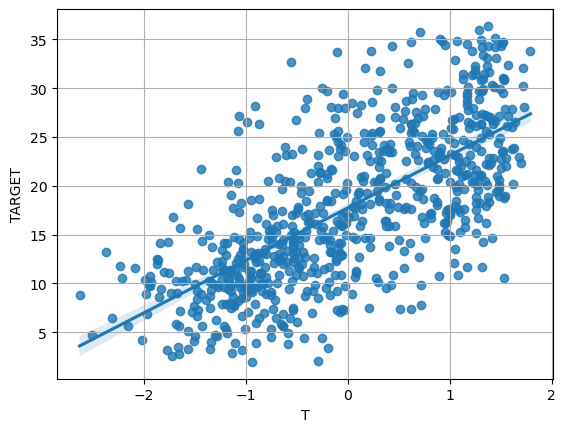

상관계수: 0.689052234927352, P-value: 6.794020275698605e-104


In [45]:
eda_2_nn(train, 'T', target)

> 온도와 발전량이 강한 양의 상관관계를 가지는 것을 확인 할 수 있는데 온도가 높을 수록 태양의 일사량이 높을 가능성이 있다고 추측할 수 있다.

* heatmap

<AxesSubplot:>

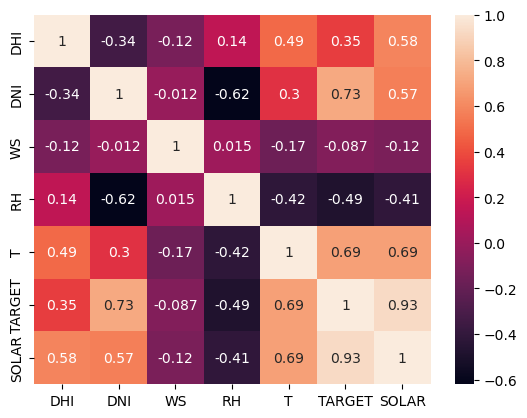

In [51]:
sns.heatmap(train.corr(), annot = True)

> heatmap 또한 위에서 분석한 결과와 같은 결과를 한눈에 볼 수 있게 나타내 준다.

* 온도와 일사량은 비례관계라 판단 따라서 두개의 값을 더해서 상관계수 분석 진행

In [57]:
train['SOLAR_T'] = train['SOLAR'] + train['T']
train.head()

,DHI,DNI,WS,RH,T,TARGET,SOLAR,SOLAR_T
0,0.315650,0.885087,3.129167,-0.563454,-0.106409,33.659014,1.200738,1.094329
1,0.075239,0.756084,3.068750,-1.030301,0.317479,20.747731,0.831323,1.148801
2,0.148714,0.628092,1.547917,-1.190128,0.411156,18.263065,0.776807,1.187962
3,0.821308,0.283800,3.020833,-0.218049,1.308111,21.072718,1.105108,2.413219
4,0.174578,0.592866,2.056250,0.286934,-0.312498,16.076963,0.767443,0.454945


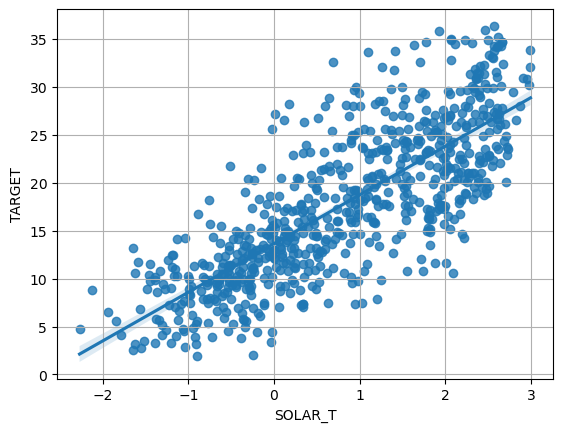

상관계수: 0.7836687441682773, P-value: 1.091450573880509e-152


In [58]:
eda_2_nn(train, 'SOLAR_T', target)

> 0.78의 상관계수가 보이며, 강한 상관관계가 있다고 판단할 수 있다.

> 결론

1. 수평면 전일사량과 법선면 직달일사량의 합인 일사량은 발전량과 가장 유사하다.
2. 일사량과 온도를 합친 컬럼도 강한 양의 상관관계를 가지는 것을 파악 할 수 있다.
3. 풍속은 발전량과 관련이 없다.
4. 상대습도는 발전량과 강한 음의 상관관계를 가지며, 법선면 직달 일사량과도 강한 음의 상관관계를 가지는 것을 볼 수 있다.
- 법선면 직달 일사량은 태양으로부터 지표면에 직각으로 입사하는 에너지 양인데 대기 중에 증기가 많을 수록 대기 분자간의 충돌로 인해서 에너지가 분산하기 때문